<a href="https://colab.research.google.com/github/juggy12/Intro-to-Colab/blob/main/first_convolutional_neural_network.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [142]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import DataLoader
from torchvision import datasets, transforms
from torchvision.utils import make_grid
import numpy as np
import pandas as pd
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
%matplotlib inline

In [143]:
transform = transforms.ToTensor()

In [144]:
train_data = datasets.MNIST(root='/cnn_data', train=True, download=True, transform=transform)

In [145]:
test_data = datasets.MNIST(root='/cnn_data', train=False, download=True, transform=transform)

In [146]:
train_data

Dataset MNIST
    Number of datapoints: 60000
    Root location: /cnn_data
    Split: Train
    StandardTransform
Transform: ToTensor()

In [147]:
test_data

Dataset MNIST
    Number of datapoints: 10000
    Root location: /cnn_data
    Split: Test
    StandardTransform
Transform: ToTensor()

In [148]:
train_loader = DataLoader(train_data, batch_size=10, shuffle=True)
test_loader = DataLoader(test_data, batch_size=10, shuffle=False)

Example Convulutional Model

In [149]:
conv1 = nn.Conv2d(1, 6, 3, 1)
conv2 = nn.Conv2d(6, 16, 3, 1)


In [150]:
for i, (x_train, y_train) in enumerate(train_data):
  break

In [151]:
x_train.shape

torch.Size([1, 28, 28])

In [152]:
x= x_train.view(1,1,28,28)

In [153]:
x = F.relu(conv1(x))

In [154]:
x.shape

torch.Size([1, 6, 26, 26])

In [155]:
x = F.max_pool2d(x,2,2)

In [156]:
x.shape

torch.Size([1, 6, 13, 13])

In [157]:
x = F.relu(conv2(x))

In [158]:
x.shape

torch.Size([1, 16, 11, 11])

In [159]:
x = F.max_pool2d(x,2,2)

In [160]:
x.shape

torch.Size([1, 16, 5, 5])

In [161]:
class ConvolutionalNetwork(nn.Module):
  def __init__(self):
    super().__init__()
    self.conv1 = nn.Conv2d(1, 6, 3, 1)
    self.conv2 = nn.Conv2d(6, 16, 3, 1)
    self.fc1 = nn.Linear(5*5*16, 120)
    self.fc2 = nn.Linear(120, 84)
    self.fc3 = nn.Linear(84, 10)
  def forward(self, x):
    x = F.relu(self.conv1(x))
    x = F.max_pool2d(x,2,2)
    x = F.relu(self.conv2(x))
    x = F.max_pool2d(x,2,2)
    x=x.view(-1, 16*5*5)
    x= F.relu(self.fc1(x))
    x= F.relu(self.fc2(x))
    x= self.fc3(x)
    return F.log_softmax(x, dim=1)


In [162]:
torch.manual_seed(41)
model = ConvolutionalNetwork()
model

ConvolutionalNetwork(
  (conv1): Conv2d(1, 6, kernel_size=(3, 3), stride=(1, 1))
  (conv2): Conv2d(6, 16, kernel_size=(3, 3), stride=(1, 1))
  (fc1): Linear(in_features=400, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=84, bias=True)
  (fc3): Linear(in_features=84, out_features=10, bias=True)
)

In [163]:
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

In [164]:
import time
start_time = time.time()

epochs = 5
train_losses = []
test_losses = []
train_correct = []
test_correct = []

for i in range(epochs):
    trn_correct = 0
    tst_correct = 0
    for b, (x_train, y_train) in enumerate(train_loader):
        b += 1
        y_pred = model(x_train)
        loss = criterion(y_pred, y_train)
        predicted = torch.max(y_pred.data, 1)[1]
        batch_corr = (predicted == y_train).sum()
        trn_correct += batch_corr
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        if b % 600 == 0:
            print(f'epoch: {i}  batch: {b} loss: {loss.item()}')

        train_losses.append(loss)
        train_correct.append(trn_correct)

    # Testing loop (outside of training loop)
    with torch.no_grad():
        for b, (x_test, y_test) in enumerate(test_loader):
            y_val = model.forward(x_test)
            predicted = torch.max(y_val.data, 1)[1]
            ts_corr = (predicted == y_test).sum()

        loss = criterion(y_val, y_test)
        test_losses.append(loss)
        test_correct.append(ts_corr)

current_time = time.time()
elapsed_time = current_time - start_time
print(f'Training took {elapsed_time}')


epoch: 0  batch: 600 loss: 0.1623609960079193
epoch: 0  batch: 1200 loss: 0.15515124797821045
epoch: 0  batch: 1800 loss: 0.4303523004055023
epoch: 0  batch: 2400 loss: 0.12933236360549927
epoch: 0  batch: 3000 loss: 0.005222576204687357
epoch: 0  batch: 3600 loss: 0.40715670585632324
epoch: 0  batch: 4200 loss: 0.004482123535126448
epoch: 0  batch: 4800 loss: 0.0022434615530073643
epoch: 0  batch: 5400 loss: 0.02891628071665764
epoch: 0  batch: 6000 loss: 0.0003335700312163681
epoch: 1  batch: 600 loss: 0.003126084106042981
epoch: 1  batch: 1200 loss: 0.3031778931617737
epoch: 1  batch: 1800 loss: 0.0024100872687995434
epoch: 1  batch: 2400 loss: 0.0018737802747637033
epoch: 1  batch: 3000 loss: 0.0162246972322464
epoch: 1  batch: 3600 loss: 0.37820178270339966
epoch: 1  batch: 4200 loss: 0.02532477118074894
epoch: 1  batch: 4800 loss: 0.0012947404757142067
epoch: 1  batch: 5400 loss: 0.0008680702303536236
epoch: 1  batch: 6000 loss: 0.3670758008956909
epoch: 2  batch: 600 loss: 0.037

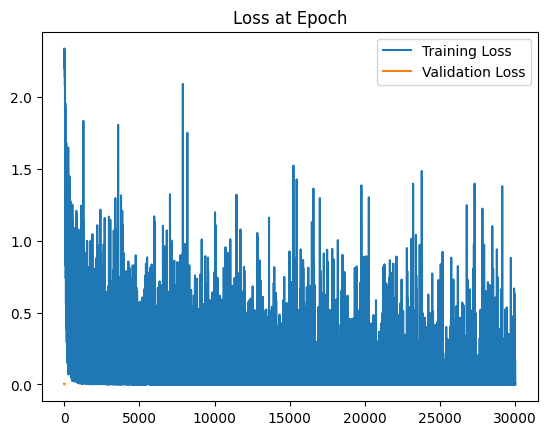

In [165]:
# Now plot directly without needing to call .item()
train_losses = [t.item() for t in train_losses]
plt.plot(train_losses, label="Training Loss")
plt.plot(test_losses, label="Validation Loss")
plt.title("Loss at Epoch")
plt.legend()


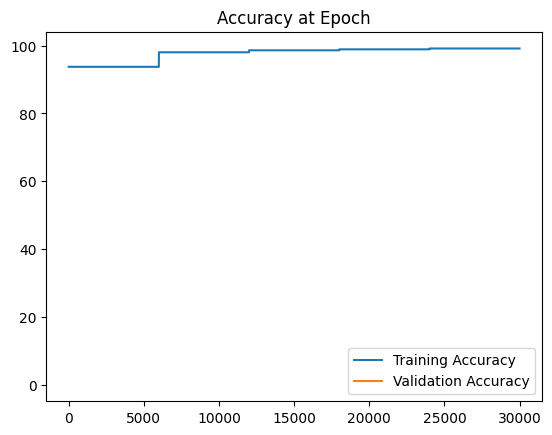

In [168]:
plt.plot([t/600 for t in train_correct], label = "Training Accuracy")
plt.plot([t/100 for t in test_correct], label = "Validation Accuracy")
plt.title("Accuracy at Epoch")
plt.legend()

In [169]:
test_load_everything = DataLoader(test_data, batch_size = 10000, shuffle=False)
with torch.no_grad():
  correct = 0
  for x_test, y_test in test_load_everything:
    y_val = model.forward(x_test)
    predicted = torch.max(y_val, 1)[1]
    correct = (predicted == y_test).sum()

In [172]:
print(correct/len(test_data))

tensor(0.9841)


In [174]:
test_data[4143][0]

tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,

In [175]:
test_data[4143][0].reshape(28,28)

tensor([[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000],
        [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000],
        [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000],
        [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000

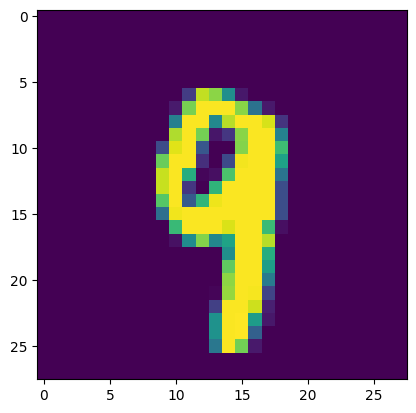

In [176]:
plt.imshow(test_data[4143][0].reshape(28,28))

In [177]:
model.eval()
with torch.no_grad():
  new_prediction = model(test_data[4143][0].view(1,1,28,28))

In [178]:
new_prediction

tensor([[-2.1949e+01, -1.7241e+01, -2.2095e+01, -1.5774e+01, -9.4154e+00,
         -1.7936e+01, -3.0714e+01, -1.1460e+01, -1.3655e+01, -9.3337e-05]])

In [179]:
new_prediction.argmax()


tensor(9)